# GNNモデルためのデータ処理
   
開発環境: python 3.11.5/ JupyterLab 3.6.3/Jupyter Notebook Version: 6.5.4/System: Linux #14~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

Pandas version: 2.0.3  
Numpy version: 1.24.3  
sklearn: 1.3.0  
matplotlib version: 3.7.2

# USDJPY
補完前のデータ数 2139165  
補完後のデータ数 3090166  

In [2]:
# CSVファイルを読み込む
USDJPY = pd.read_csv('currency_pair/USDJPY.csv',sep = ',')

# 'Times' 列を日時型に変換する
USDJPY['Times'] = pd.to_datetime(USDJPY['Times'], format='%Y%m%d %H%M%S',errors='coerce')

# 重複した行を削除する
USDJPY = USDJPY.drop_duplicates(subset=['Times'])

display(USDJPY)

,Times,Final Price
0,2018-01-01 17:01:00,112.616
1,2018-01-01 17:02:00,112.634
2,2018-01-01 17:03:00,112.620
3,2018-01-01 17:04:00,112.613
4,2018-01-01 17:05:00,112.620
...,...,...
2139460,2023-11-17 16:54:00,149.638
2139461,2023-11-17 16:55:00,149.633
2139462,2023-11-17 16:56:00,149.622
2139463,2023-11-17 16:57:00,149.619


In [3]:
# 1分ごとのデータに補完して再設定
USDJPY.set_index('Times', inplace=True)
USDJPY = USDJPY.resample('1T').interpolate().reset_index()

# 最終価格を正規化する
scaler = MinMaxScaler()
USDJPY['Final Price Normalized'] = scaler.fit_transform(USDJPY[['Final Price']])

# 1時間ごとのリターンを計算する
USDJPY['1h_Return'] = np.log(USDJPY['Final Price'] / USDJPY['Final Price'].shift(60))
USDJPY['1h_Return'] = USDJPY['1h_Return'].fillna(0)

display(USDJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 17:01:00,112.616,0.224973,0.000000
1,2018-01-01 17:02:00,112.634,0.225328,0.000000
2,2018-01-01 17:03:00,112.620,0.225052,0.000000
3,2018-01-01 17:04:00,112.613,0.224914,0.000000
4,2018-01-01 17:05:00,112.620,0.225052,0.000000
...,...,...,...,...
3090233,2023-11-17 16:54:00,149.638,0.954816,-0.000107
3090234,2023-11-17 16:55:00,149.633,0.954718,-0.000114
3090235,2023-11-17 16:56:00,149.622,0.954501,-0.000227
3090236,2023-11-17 16:57:00,149.619,0.954442,-0.000434


In [4]:
# データを指定の期間にトリミングする
USDJPY.set_index('Times', inplace=True)

start_date = '2018-01-01 18:09:00'
end_date = '2023-11-17 16:54:00'
USDJPY = USDJPY.loc[start_date:end_date]

USDJPY.reset_index(inplace=True)

display(USDJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 18:09:00,112.650,0.225644,0.000435
1,2018-01-01 18:10:00,112.635,0.225348,0.000169
2,2018-01-01 18:11:00,112.646,0.225565,0.000222
3,2018-01-01 18:12:00,112.645,0.225545,0.000213
4,2018-01-01 18:13:00,112.642,0.225486,0.000169
...,...,...,...,...
3090161,2023-11-17 16:50:00,149.644,0.954934,-0.000094
3090162,2023-11-17 16:51:00,149.642,0.954895,-0.000107
3090163,2023-11-17 16:52:00,149.641,0.954875,-0.000120
3090164,2023-11-17 16:53:00,149.642,0.954895,-0.000100


the number of positive return： 1549664
the number of negative return： 1540502


,Times,Final Price,Final Price Normalized,1h_Return,Label,Currency
0,2018-01-01 18:09:00,112.650,0.225644,0.000435,1,1
1,2018-01-01 18:10:00,112.635,0.225348,0.000169,1,1
2,2018-01-01 18:11:00,112.646,0.225565,0.000222,1,1
3,2018-01-01 18:12:00,112.645,0.225545,0.000213,1,1
4,2018-01-01 18:13:00,112.642,0.225486,0.000169,1,1
...,...,...,...,...,...,...
3090161,2023-11-17 16:50:00,149.644,0.954934,-0.000094,0,1
3090162,2023-11-17 16:51:00,149.642,0.954895,-0.000107,0,1
3090163,2023-11-17 16:52:00,149.641,0.954875,-0.000120,0,1
3090164,2023-11-17 16:53:00,149.642,0.954895,-0.000100,0,1


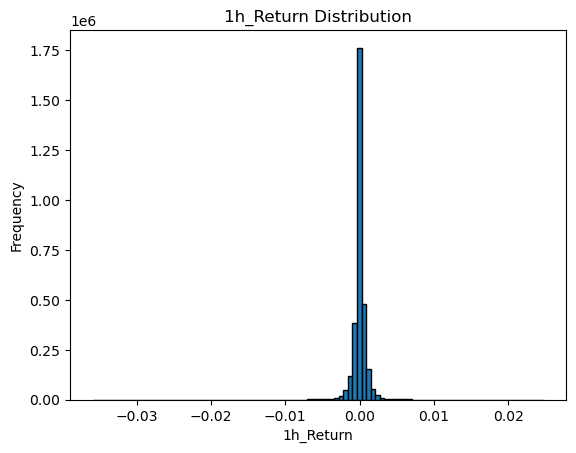

count    3.090166e+06
mean     5.525032e-06
std      8.734297e-04
min     -3.587615e-02
25%     -2.013157e-04
50%      0.000000e+00
75%      2.351863e-04
max      2.477081e-02
Name: 1h_Return, dtype: float64

In [5]:
# リターンは０、もしくは０より大きい場合はラベルが１、他の場合は０
USDJPY['Label'] = np.where(USDJPY['1h_Return'] >= 0, 1, 0)
label_counts = USDJPY['Label'].value_counts()
print("the number of positive return：", label_counts[1])
print("the number of negative return：", label_counts[0])

USDJPY['Currency'] = 1
display(USDJPY)

# リターンの分布を描く
plt.hist(USDJPY['1h_Return'], bins=99,edgecolor='black')
plt.title('1h_Return Distribution')
plt.xlabel('1h_Return')
plt.ylabel('Frequency')
plt.show()

USDJPY['1h_Return'].describe()

In [6]:
# CSVファイルに保存する
USDJPY.to_csv('USDJPY.csv', index=False)

# CADJPY
補完前のデータ数 2150696  
補完後のデータ数 3090166   

In [7]:
# CSVファイルを読み込む
CADJPY = pd.read_csv('currency_pair/CADJPY.csv',sep = ',')

# 'Times' 列を日時型に変換する
CADJPY['Times'] = pd.to_datetime(CADJPY['Times'], format='%Y%m%d %H%M%S',errors='coerce')

# 重複した行を削除する
CADJPY = CADJPY.drop_duplicates(subset=['Times'])

display(CADJPY)

,Times,Final Price
0,2018-01-01 17:01:00,89.827
1,2018-01-01 17:02:00,89.765
2,2018-01-01 17:03:00,89.737
3,2018-01-01 17:04:00,89.732
4,2018-01-01 17:05:00,89.730
...,...,...
2150991,2023-11-24 16:53:00,109.533
2150992,2023-11-24 16:54:00,109.533
2150993,2023-11-24 16:55:00,109.462
2150994,2023-11-24 16:56:00,109.470


In [8]:
# 1分ごとのデータに補完して再設定
CADJPY.set_index('Times', inplace=True)
CADJPY = CADJPY.resample('1T').interpolate().reset_index()

# 最終価格を正規化する
CADJPY['Final Price Normalized'] = scaler.fit_transform(CADJPY[['Final Price']])

# 1時間ごとのリターンを計算する
CADJPY['1h_Return'] = np.log(CADJPY['Final Price'] / CADJPY['Final Price'].shift(60))
CADJPY['1h_Return'] = CADJPY['1h_Return'].fillna(0)

display(CADJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 17:01:00,89.827,0.427989,0.000000
1,2018-01-01 17:02:00,89.765,0.426326,0.000000
2,2018-01-01 17:03:00,89.737,0.425575,0.000000
3,2018-01-01 17:04:00,89.732,0.425441,0.000000
4,2018-01-01 17:05:00,89.730,0.425388,0.000000
...,...,...,...,...
3100312,2023-11-24 16:53:00,109.533,0.956498,-0.001159
3100313,2023-11-24 16:54:00,109.533,0.956498,-0.001031
3100314,2023-11-24 16:55:00,109.462,0.954594,-0.001743
3100315,2023-11-24 16:56:00,109.470,0.954809,-0.001862


In [9]:
# データを指定の期間にトリミングする
CADJPY.set_index('Times', inplace=True)

start_date = '2018-01-01 18:09:00'
end_date = '2023-11-17 16:54:00'
CADJPY = CADJPY.loc[start_date:end_date]
CADJPY.reset_index(inplace=True)
display(CADJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 18:09:00,89.699,0.424556,-0.000212
1,2018-01-01 18:10:00,89.693,0.424395,-0.000312
2,2018-01-01 18:11:00,89.702,0.424637,-0.000201
3,2018-01-01 18:12:00,89.702,0.424637,-0.000201
4,2018-01-01 18:13:00,89.700,0.424583,-0.000212
...,...,...,...,...
3090161,2023-11-17 16:50:00,109.106,0.945046,-0.000027
3090162,2023-11-17 16:51:00,109.095,0.944751,-0.000183
3090163,2023-11-17 16:52:00,109.085,0.944483,-0.000302
3090164,2023-11-17 16:53:00,109.086,0.944510,-0.000348


the number of positive return： 1536540
the number of negative return： 1553626


,Times,Final Price,Final Price Normalized,1h_Return,Label,Currency
0,2018-01-01 18:09:00,89.699,0.424556,-0.000212,0,1
1,2018-01-01 18:10:00,89.693,0.424395,-0.000312,0,1
2,2018-01-01 18:11:00,89.702,0.424637,-0.000201,0,1
3,2018-01-01 18:12:00,89.702,0.424637,-0.000201,0,1
4,2018-01-01 18:13:00,89.700,0.424583,-0.000212,0,1
...,...,...,...,...,...,...
3090161,2023-11-17 16:50:00,109.106,0.945046,-0.000027,0,1
3090162,2023-11-17 16:51:00,109.095,0.944751,-0.000183,0,1
3090163,2023-11-17 16:52:00,109.085,0.944483,-0.000302,0,1
3090164,2023-11-17 16:53:00,109.086,0.944510,-0.000348,0,1


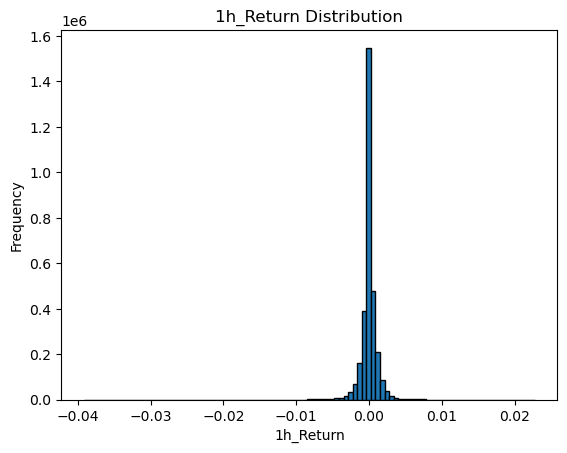

count    3.090166e+06
mean     3.804379e-06
std      1.059518e-03
min     -3.917431e-02
25%     -2.851082e-04
50%     -2.528589e-07
75%      3.317667e-04
max      2.279141e-02
Name: 1h_Return, dtype: float64

In [10]:
# リターンは０、もしくは０より大きい場合はラベルが１、他の場合は０
CADJPY['Label'] = np.where(CADJPY['1h_Return'] >= 0, 1, 0)
label_counts = CADJPY['Label'].value_counts()
print("the number of positive return：", label_counts[1])
print("the number of negative return：", label_counts[0])

CADJPY['Currency'] = 1
display(CADJPY)

# リターンの分布を描く
plt.hist(CADJPY['1h_Return'], bins=99,edgecolor='black')
plt.title('1h_Return Distribution')
plt.xlabel('1h_Return')
plt.ylabel('Frequency')
plt.show()

CADJPY['1h_Return'].describe()

In [11]:
# CSVファイルに保存する
CADJPY.to_csv('processed_data/CADJPY.csv', index=False)

# AUDJPY
補完前のデータ数 2143849  
補完後のデータ数 3090166   

In [12]:
# CSVファイルを読み込む
AUDJPY = pd.read_csv('currency_pair/AUDJPY.csv',sep = ',')

# 'Times' 列を日時型に変換する
AUDJPY['Times'] = pd.to_datetime(AUDJPY['Times'], format='%Y%m%d %H%M%S',errors='coerce')

# 重複した行を削除する
AUDJPY = AUDJPY.drop_duplicates(subset=['Times'])

display(AUDJPY)

,Times,Final Price
0,2018-01-01 17:02:00,87.904
1,2018-01-01 17:03:00,87.897
2,2018-01-01 17:04:00,87.884
3,2018-01-01 17:05:00,87.840
4,2018-01-01 17:06:00,87.843
...,...,...
2144144,2023-11-17 16:54:00,97.482
2144145,2023-11-17 16:55:00,97.474
2144146,2023-11-17 16:56:00,97.474
2144147,2023-11-17 16:57:00,97.474


In [13]:
# 1分ごとのデータに補完して再設定
AUDJPY.set_index('Times', inplace=True)
AUDJPY = AUDJPY.resample('1T').interpolate().reset_index()

# 価格を正規化する
AUDJPY['Final Price Normalized'] = scaler.fit_transform(AUDJPY[['Final Price']])

# 1時間ごとのリターンを計算する
AUDJPY['1h_Return'] = np.log(AUDJPY['Final Price'] / AUDJPY['Final Price'].shift(60))
AUDJPY['1h_Return'] = AUDJPY['1h_Return'].fillna(0)

display(AUDJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 17:02:00,87.904,0.723308,0.000000
1,2018-01-01 17:03:00,87.897,0.723126,0.000000
2,2018-01-01 17:04:00,87.884,0.722789,0.000000
3,2018-01-01 17:05:00,87.840,0.721649,0.000000
4,2018-01-01 17:06:00,87.843,0.721727,0.000000
...,...,...,...,...
3090232,2023-11-17 16:54:00,97.482,0.971520,0.000062
3090233,2023-11-17 16:55:00,97.474,0.971312,-0.000010
3090234,2023-11-17 16:56:00,97.474,0.971312,0.000000
3090235,2023-11-17 16:57:00,97.474,0.971312,-0.000287


In [14]:
# データを指定の期間にトリミングする
AUDJPY.set_index('Times', inplace=True)

start_date = '2018-01-01 18:09:00'
end_date = '2023-11-17 16:54:00'
AUDJPY = AUDJPY.loc[start_date:end_date]
AUDJPY.reset_index(inplace=True)
display(AUDJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 18:09:00,87.929,0.723956,0.001058
1,2018-01-01 18:10:00,87.900,0.723204,0.000603
2,2018-01-01 18:11:00,87.944,0.724344,0.001274
3,2018-01-01 18:12:00,87.942,0.724293,0.000956
4,2018-01-01 18:13:00,87.975,0.725148,0.001331
...,...,...,...,...
3090161,2023-11-17 16:50:00,97.498,0.971934,0.000472
3090162,2023-11-17 16:51:00,97.493,0.971805,0.000287
3090163,2023-11-17 16:52:00,97.491,0.971753,0.000226
3090164,2023-11-17 16:53:00,97.489,0.971701,0.000154


the number of positive return： 1488498
the number of negative return： 1601668


,Times,Final Price,Final Price Normalized,1h_Return,Label,Currency
0,2018-01-01 18:09:00,87.929,0.723956,0.001058,1,2
1,2018-01-01 18:10:00,87.900,0.723204,0.000603,1,2
2,2018-01-01 18:11:00,87.944,0.724344,0.001274,1,2
3,2018-01-01 18:12:00,87.942,0.724293,0.000956,1,2
4,2018-01-01 18:13:00,87.975,0.725148,0.001331,1,2
...,...,...,...,...,...,...
3090161,2023-11-17 16:50:00,97.498,0.971934,0.000472,1,2
3090162,2023-11-17 16:51:00,97.493,0.971805,0.000287,1,2
3090163,2023-11-17 16:52:00,97.491,0.971753,0.000226,1,2
3090164,2023-11-17 16:53:00,97.489,0.971701,0.000154,1,2


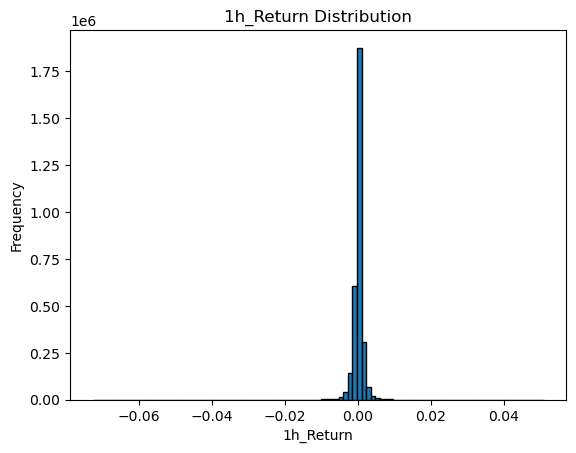

count    3.090166e+06
mean     2.014462e-06
std      1.243224e-03
min     -7.272069e-02
25%     -3.302613e-04
50%     -4.421930e-06
75%      3.889614e-04
max      5.091749e-02
Name: 1h_Return, dtype: float64

In [15]:
# リターンは０、もしくは０より大きい場合はラベルが１、他の場合は０
AUDJPY['Label'] = np.where(AUDJPY['1h_Return'] >= 0, 1, 0)
label_counts = AUDJPY['Label'].value_counts()
print("the number of positive return：", label_counts[1])
print("the number of negative return：", label_counts[0])

AUDJPY['Currency'] = 2
display(AUDJPY)

# リターンの分布を描く
plt.hist(AUDJPY['1h_Return'], bins=99,edgecolor='black')
plt.title('1h_Return Distribution')
plt.xlabel('1h_Return')
plt.ylabel('Frequency')
plt.show()

AUDJPY['1h_Return'].describe()

In [16]:
AUDJPY.to_csv('processed_data/AUDJPY.csv', index=False)

# EURJPY
補完前のデータ数 2125542  
補完後のデータ数 3090166    

In [3]:
# CSVファイルを読み込む
EURJPY = pd.read_csv('currency_pair/EURJPY.csv',sep = ',')

# 'Times' 列を日時型に変換する
EURJPY['Times'] = pd.to_datetime(EURJPY['Times'], format='%Y%m%d %H%M%S',errors='coerce')

# 重複した行を削除する
EURJPY = EURJPY.drop_duplicates(subset=['Times'])

display(EURJPY)

,Times,Final Price
0,2018-01-01 17:02:00,135.219
1,2018-01-01 17:03:00,135.211
2,2018-01-01 17:04:00,135.206
3,2018-01-01 17:05:00,135.208
4,2018-01-01 17:06:00,135.210
...,...,...
2125837,2023-11-17 16:54:00,163.298
2125838,2023-11-17 16:55:00,163.286
2125839,2023-11-17 16:56:00,163.292
2125840,2023-11-17 16:57:00,163.282


In [5]:
# 1分ごとのデータに補完して再設定
EURJPY.set_index('Times', inplace=True)
EURJPY = EURJPY.resample('1T').interpolate().reset_index()

# 価格を正規化する
scaler = MinMaxScaler()
EURJPY['Final Price Normalized'] = scaler.fit_transform(EURJPY[['Final Price']])

# 1時間ごとのリターンを計算する
EURJPY['1h_Return'] = np.log(EURJPY['Final Price'] / EURJPY['Final Price'].shift(60))
EURJPY['1h_Return'] = EURJPY['1h_Return'].fillna(0)

display(EURJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 17:02:00,135.219,0.416879,0.000000
1,2018-01-01 17:03:00,135.211,0.416718,0.000000
2,2018-01-01 17:04:00,135.206,0.416618,0.000000
3,2018-01-01 17:05:00,135.208,0.416658,0.000000
4,2018-01-01 17:06:00,135.210,0.416698,0.000000
...,...,...,...,...
3090232,2023-11-17 16:54:00,163.298,0.980160,0.000404
3090233,2023-11-17 16:55:00,163.286,0.979919,0.000257
3090234,2023-11-17 16:56:00,163.292,0.980040,0.000263
3090235,2023-11-17 16:57:00,163.282,0.979839,-0.000018


In [6]:
# データを指定の期間にトリミングする
EURJPY.set_index('Times', inplace=True)

start_date = '2018-01-01 18:09:00'
end_date = '2023-11-17 16:54:00'
EURJPY = EURJPY.loc[start_date:end_date]
EURJPY.reset_index(inplace=True)
display(EURJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 18:09:00,135.306,0.418624,0.000266
1,2018-01-01 18:10:00,135.303,0.418564,0.000451
2,2018-01-01 18:11:00,135.285,0.418203,0.000281
3,2018-01-01 18:12:00,135.284,0.418183,0.000325
4,2018-01-01 18:13:00,135.318,0.418865,0.000517
...,...,...,...,...
3090161,2023-11-17 16:50:00,163.297,0.980140,0.000594
3090162,2023-11-17 16:51:00,163.294,0.980080,0.000502
3090163,2023-11-17 16:52:00,163.297,0.980140,0.000484
3090164,2023-11-17 16:53:00,163.298,0.980160,0.000435


the number of positive return： 1476387
the number of negative return： 1613779


,Times,Final Price,Final Price Normalized,1h_Return,Label,Currency
0,2018-01-01 18:09:00,135.306,0.418624,0.000266,1,3
1,2018-01-01 18:10:00,135.303,0.418564,0.000451,1,3
2,2018-01-01 18:11:00,135.285,0.418203,0.000281,1,3
3,2018-01-01 18:12:00,135.284,0.418183,0.000325,1,3
4,2018-01-01 18:13:00,135.318,0.418865,0.000517,1,3
...,...,...,...,...,...,...
3090161,2023-11-17 16:50:00,163.297,0.980140,0.000594,1,3
3090162,2023-11-17 16:51:00,163.294,0.980080,0.000502,1,3
3090163,2023-11-17 16:52:00,163.297,0.980140,0.000484,1,3
3090164,2023-11-17 16:53:00,163.298,0.980160,0.000435,1,3


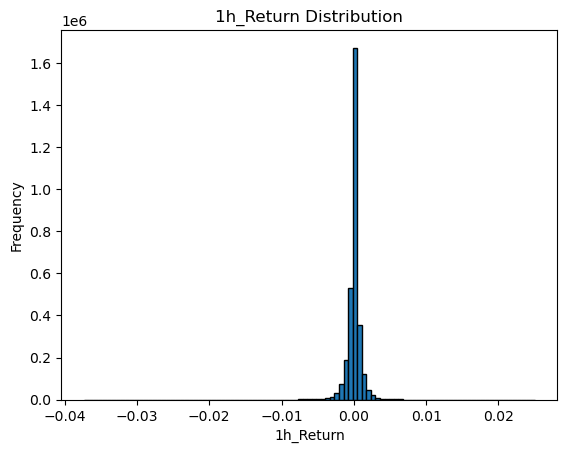

count    3.090166e+06
mean     3.655930e-06
std      9.092300e-04
min     -3.734000e-02
25%     -2.255093e-04
50%     -2.575395e-06
75%      2.661386e-04
max      2.504215e-02
Name: 1h_Return, dtype: float64

In [7]:
# リターンは０、もしくは０より大きい場合はラベルが１、他の場合は０
EURJPY['Label'] = np.where(EURJPY['1h_Return'] >= 0, 1, 0)
label_counts = EURJPY['Label'].value_counts()
print("the number of positive return：", label_counts[1])
print("the number of negative return：", label_counts[0])

EURJPY['Currency'] = 3
display(EURJPY)

# リターンの分布を描く
plt.hist(EURJPY['1h_Return'], bins=99,edgecolor='black')
plt.title('1h_Return Distribution')
plt.xlabel('1h_Return')
plt.ylabel('Frequency')
plt.show()

EURJPY['1h_Return'].describe()

In [8]:
# CSVファイルに保存する
EURJPY.to_csv('processed_data/EURJPY.csv', index=False)

# ZARJPY
補完前のデータ数 2018527  
補完後のデータ数 3090166  

In [9]:
# ファイルを読み込む
ZARJPY = pd.read_csv('currency_pair/ZARJPY.csv',sep = ',')

# 'Times' 列を日時型に変換する
ZARJPY['Times'] = pd.to_datetime(ZARJPY['Times'], format='%Y%m%d %H%M%S',errors='coerce')

# 重複した行を削除する
ZARJPY = ZARJPY.drop_duplicates(subset=['Times'])

display(ZARJPY)

,Times,Final Price
0,2018-01-01 17:04:00,9.066
1,2018-01-01 17:05:00,9.068
2,2018-01-01 17:06:00,9.069
3,2018-01-01 17:07:00,9.069
4,2018-01-01 17:08:00,9.069
...,...,...
2018799,2023-11-24 16:53:00,7.943
2018800,2023-11-24 16:54:00,7.943
2018801,2023-11-24 16:55:00,7.943
2018802,2023-11-24 16:56:00,7.944


In [10]:
# 1分ごとのデータに補完して再設定
ZARJPY.set_index('Times', inplace=True)
ZARJPY = ZARJPY.resample('1T').interpolate().reset_index()

# 価格を正規化する
ZARJPY['Final Price Normalized'] = scaler.fit_transform(ZARJPY[['Final Price']])

# 1時間ごとのリターンを計算する
ZARJPY['1h_Return'] = np.log(ZARJPY['Final Price'] / ZARJPY['Final Price'].shift(60))
ZARJPY['1h_Return'] = ZARJPY['1h_Return'].fillna(0)

display(ZARJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 17:04:00,9.066,0.941351,0.000000
1,2018-01-01 17:05:00,9.068,0.941889,0.000000
2,2018-01-01 17:06:00,9.069,0.942158,0.000000
3,2018-01-01 17:07:00,9.069,0.942158,0.000000
4,2018-01-01 17:08:00,9.069,0.942158,0.000000
...,...,...,...,...
3100309,2023-11-24 16:53:00,7.943,0.639225,0.000252
3100310,2023-11-24 16:54:00,7.943,0.639225,0.000378
3100311,2023-11-24 16:55:00,7.943,0.639225,0.000378
3100312,2023-11-24 16:56:00,7.944,0.639494,0.000252


In [11]:
# データを指定の期間にトリミングする
ZARJPY.set_index('Times', inplace=True)

start_date = '2018-01-01 18:09:00'
end_date = '2023-11-17 16:54:00'
ZARJPY = ZARJPY.loc[start_date:end_date]
ZARJPY.reset_index(inplace=True)
display(ZARJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 18:09:00,9.057,0.938929,-0.001324
1,2018-01-01 18:10:00,9.055,0.938391,-0.001545
2,2018-01-01 18:11:00,9.055,0.938391,-0.001545
3,2018-01-01 18:12:00,9.057,0.938929,-0.001324
4,2018-01-01 18:13:00,9.057,0.938929,-0.001324
...,...,...,...,...
3090161,2023-11-17 16:50:00,8.154,0.695991,0.000245
3090162,2023-11-17 16:51:00,8.154,0.695991,0.000245
3090163,2023-11-17 16:52:00,8.155,0.696260,0.000368
3090164,2023-11-17 16:53:00,8.154,0.695991,0.000123


the number of positive return： 1594232
the number of negative return： 1495934


,Times,Final Price,Final Price Normalized,1h_Return,Label,Currency
0,2018-01-01 18:09:00,9.057,0.938929,-0.001324,0,4
1,2018-01-01 18:10:00,9.055,0.938391,-0.001545,0,4
2,2018-01-01 18:11:00,9.055,0.938391,-0.001545,0,4
3,2018-01-01 18:12:00,9.057,0.938929,-0.001324,0,4
4,2018-01-01 18:13:00,9.057,0.938929,-0.001324,0,4
...,...,...,...,...,...,...
3090161,2023-11-17 16:50:00,8.154,0.695991,0.000245,1,4
3090162,2023-11-17 16:51:00,8.154,0.695991,0.000245,1,4
3090163,2023-11-17 16:52:00,8.155,0.696260,0.000368,1,4
3090164,2023-11-17 16:53:00,8.154,0.695991,0.000123,1,4


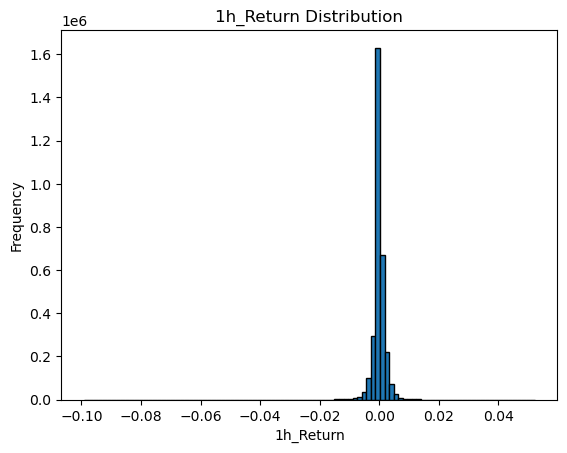

count    3.090166e+06
mean    -2.045571e-06
std      1.899091e-03
min     -9.913932e-02
25%     -5.199532e-04
50%      0.000000e+00
75%      6.100237e-04
max      5.221958e-02
Name: 1h_Return, dtype: float64

In [12]:
# リターンは０、もしくは０より大きい場合はラベルが１、他の場合は０
ZARJPY['Label'] = np.where(ZARJPY['1h_Return'] >= 0, 1, 0)
label_counts = ZARJPY['Label'].value_counts()
print("the number of positive return：", label_counts[1])
print("the number of negative return：", label_counts[0])

ZARJPY['Currency'] = 4
display(ZARJPY)

# リターンの分布を描く
plt.hist(ZARJPY['1h_Return'], bins=99,edgecolor='black')
plt.title('1h_Return Distribution')
plt.xlabel('1h_Return')
plt.ylabel('Frequency')
plt.show()

ZARJPY['1h_Return'].describe()

In [13]:
# CSVファイルに保存する
ZARJPY.to_csv('processed_data/ZARJPY.csv', index=False)

# SGDJPY
補完前のデータ数 2133490  
補完後のデータ数 3090166  

In [14]:
# USDJPY.csv ファイルを読み込む
SGDJPY = pd.read_csv('currency_pair/SGDJPY.csv',sep = ',')

# 'Times' 列を日時型に変換する
SGDJPY['Times'] = pd.to_datetime(SGDJPY['Times'], format='%Y%m%d %H%M%S',errors='coerce')

# 重複した行を削除する（'Times' 列を基準に重複を判定）
SGDJPY = SGDJPY.drop_duplicates(subset=['Times'])

display(SGDJPY)

,Times,Final Price
0,2018-01-01 17:03:00,84.206
1,2018-01-01 17:04:00,84.203
2,2018-01-01 17:05:00,84.203
3,2018-01-01 17:06:00,84.205
4,2018-01-01 17:07:00,84.206
...,...,...
2133785,2023-11-24 16:52:00,111.399
2133786,2023-11-24 16:53:00,111.408
2133787,2023-11-24 16:55:00,111.376
2133788,2023-11-24 16:56:00,111.388


In [15]:
# 1分ごとのデータに補完して再設定
SGDJPY.set_index('Times', inplace=True)
SGDJPY = SGDJPY.resample('1T').interpolate().reset_index()

# 価格を正規化する
SGDJPY['Final Price Normalized'] = scaler.fit_transform(SGDJPY[['Final Price']])

# 1時間ごとのリターンを計算する
SGDJPY['1h_Return'] = np.log(SGDJPY['Final Price'] / SGDJPY['Final Price'].shift(60))
SGDJPY['1h_Return'] = SGDJPY['1h_Return'].fillna(0)

display(SGDJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 17:03:00,84.206,0.282418,0.000000
1,2018-01-01 17:04:00,84.203,0.282341,0.000000
2,2018-01-01 17:05:00,84.203,0.282341,0.000000
3,2018-01-01 17:06:00,84.205,0.282392,0.000000
4,2018-01-01 17:07:00,84.206,0.282418,0.000000
...,...,...,...,...
3100310,2023-11-24 16:53:00,111.408,0.979101,-0.001005
3100311,2023-11-24 16:54:00,111.392,0.978691,-0.001122
3100312,2023-11-24 16:55:00,111.376,0.978281,-0.001220
3100313,2023-11-24 16:56:00,111.388,0.978589,-0.000996


In [16]:
# データを指定の期間にトリミングする
SGDJPY.set_index('Times', inplace=True)

start_date = '2018-01-01 18:09:00'
end_date = '2023-11-17 16:54:00'
SGDJPY = SGDJPY.loc[start_date:end_date]
SGDJPY.reset_index(inplace=True)
display(SGDJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 18:09:00,84.209,0.282495,0.000249
1,2018-01-01 18:10:00,84.170,0.281496,-0.000285
2,2018-01-01 18:11:00,84.205,0.282392,0.000178
3,2018-01-01 18:12:00,84.220,0.282776,0.000392
4,2018-01-01 18:13:00,84.227,0.282956,0.000487
...,...,...,...,...
3090161,2023-11-17 16:50:00,111.401,0.978922,-0.000135
3090162,2023-11-17 16:51:00,111.398,0.978845,-0.000153
3090163,2023-11-17 16:52:00,111.387,0.978563,-0.000269
3090164,2023-11-17 16:53:00,111.388,0.978589,-0.000233


the number of positive return： 1489620
the number of negative return： 1600546


,Times,Final Price,Final Price Normalized,1h_Return,Label,Currency
0,2018-01-01 18:09:00,84.209,0.282495,0.000249,1,5
1,2018-01-01 18:10:00,84.170,0.281496,-0.000285,0,5
2,2018-01-01 18:11:00,84.205,0.282392,0.000178,1,5
3,2018-01-01 18:12:00,84.220,0.282776,0.000392,1,5
4,2018-01-01 18:13:00,84.227,0.282956,0.000487,1,5
...,...,...,...,...,...,...
3090161,2023-11-17 16:50:00,111.401,0.978922,-0.000135,0,5
3090162,2023-11-17 16:51:00,111.398,0.978845,-0.000153,0,5
3090163,2023-11-17 16:52:00,111.387,0.978563,-0.000269,0,5
3090164,2023-11-17 16:53:00,111.388,0.978589,-0.000233,0,5


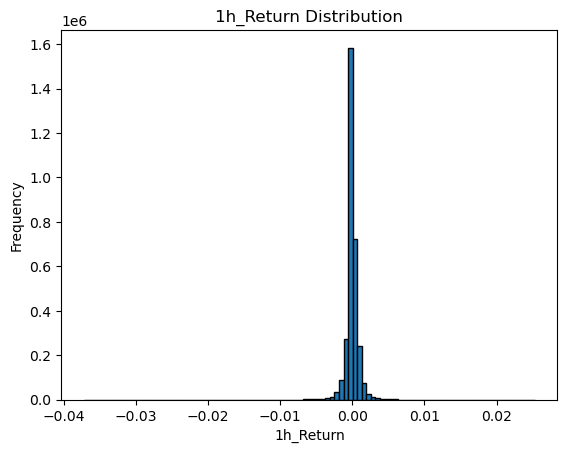

count    3.090166e+06
mean     5.441935e-06
std      8.333089e-04
min     -3.717758e-02
25%     -2.174394e-04
50%     -2.999285e-06
75%      2.599302e-04
max      2.530609e-02
Name: 1h_Return, dtype: float64

In [17]:
# リターンは０、もしくは０より大きい場合はラベルが１、他の場合は０
SGDJPY['Label'] = np.where(SGDJPY['1h_Return'] >= 0, 1, 0)
label_counts = SGDJPY['Label'].value_counts()
print("the number of positive return：", label_counts[1])
print("the number of negative return：", label_counts[0])

SGDJPY['Currency'] = 5
display(SGDJPY)

# リターンの分布を描く
plt.hist(SGDJPY['1h_Return'], bins=99,edgecolor='black')
plt.title('1h_Return Distribution')
plt.xlabel('1h_Return')
plt.ylabel('Frequency')
plt.show()

SGDJPY['1h_Return'].describe()

In [18]:
# CSVファイルに保存する
SGDJPY.to_csv('processed_data/SGDJPY.csv', index=False)

# NZDJPY
補完前のデータ数 2147470  
補完後のデータ数 3090166  

In [19]:
# CSVファイルを読み込む
NZDJPY = pd.read_csv('currency_pair/NZDJPY.csv',sep = ',')

# 'Times' 列を日時型に変換する
NZDJPY['Times'] = pd.to_datetime(NZDJPY['Times'], format='%Y%m%d %H%M%S',errors='coerce')

# 重複した行を削除する
NZDJPY = NZDJPY.drop_duplicates(subset=['Times'])

display(NZDJPY)

,Times,Final Price
0,2018-01-01 17:03:00,80.010
1,2018-01-01 17:04:00,79.998
2,2018-01-01 17:05:00,80.003
3,2018-01-01 17:06:00,80.008
4,2018-01-01 17:07:00,80.009
...,...,...
2147765,2023-11-24 16:54:00,90.905
2147766,2023-11-24 16:55:00,90.859
2147767,2023-11-24 16:56:00,90.855
2147768,2023-11-24 16:57:00,90.855


In [20]:
# 1分ごとのデータに補完して再設定
NZDJPY.set_index('Times', inplace=True)
NZDJPY = NZDJPY.resample('1T').interpolate().reset_index()

# 価格を正規化する
NZDJPY['Final Price Normalized'] = scaler.fit_transform(NZDJPY[['Final Price']])

# 1時間ごとのリターンを計算する
NZDJPY['1h_Return'] = np.log(NZDJPY['Final Price'] / NZDJPY['Final Price'].shift(60))
NZDJPY['1h_Return'] = NZDJPY['1h_Return'].fillna(0)

display(NZDJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 17:03:00,80.010,0.645743,0.000000
1,2018-01-01 17:04:00,79.998,0.645363,0.000000
2,2018-01-01 17:05:00,80.003,0.645521,0.000000
3,2018-01-01 17:06:00,80.008,0.645680,0.000000
4,2018-01-01 17:07:00,80.009,0.645711,0.000000
...,...,...,...,...
3100311,2023-11-24 16:54:00,90.905,0.990969,-0.000209
3100312,2023-11-24 16:55:00,90.859,0.989512,-0.000649
3100313,2023-11-24 16:56:00,90.855,0.989385,-0.000693
3100314,2023-11-24 16:57:00,90.855,0.989385,-0.001111


In [21]:
# データを指定の期間にトリミングする
NZDJPY.set_index('Times', inplace=True)

start_date = '2018-01-01 18:09:00'
end_date = '2023-11-17 16:54:00'
NZDJPY = NZDJPY.loc[start_date:end_date]
NZDJPY.reset_index(inplace=True)
display(NZDJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 18:09:00,79.935,0.643366,-0.000800
1,2018-01-01 18:10:00,79.943,0.643620,-0.000750
2,2018-01-01 18:11:00,79.910,0.642574,-0.001138
3,2018-01-01 18:12:00,79.896,0.642131,-0.001301
4,2018-01-01 18:13:00,79.892,0.642004,-0.001338
...,...,...,...,...
3090161,2023-11-17 16:50:00,89.647,0.951107,0.000670
3090162,2023-11-17 16:51:00,89.647,0.951107,0.000569
3090163,2023-11-17 16:52:00,89.643,0.950981,0.000502
3090164,2023-11-17 16:53:00,89.647,0.951107,0.000491


the number of positive return： 1522262
the number of negative return： 1567904


,Times,Final Price,Final Price Normalized,1h_Return,Label,Currency
0,2018-01-01 18:09:00,79.935,0.643366,-0.000800,0,6
1,2018-01-01 18:10:00,79.943,0.643620,-0.000750,0,6
2,2018-01-01 18:11:00,79.910,0.642574,-0.001138,0,6
3,2018-01-01 18:12:00,79.896,0.642131,-0.001301,0,6
4,2018-01-01 18:13:00,79.892,0.642004,-0.001338,0,6
...,...,...,...,...,...,...
3090161,2023-11-17 16:50:00,89.647,0.951107,0.000670,1,6
3090162,2023-11-17 16:51:00,89.647,0.951107,0.000569,1,6
3090163,2023-11-17 16:52:00,89.643,0.950981,0.000502,1,6
3090164,2023-11-17 16:53:00,89.647,0.951107,0.000491,1,6


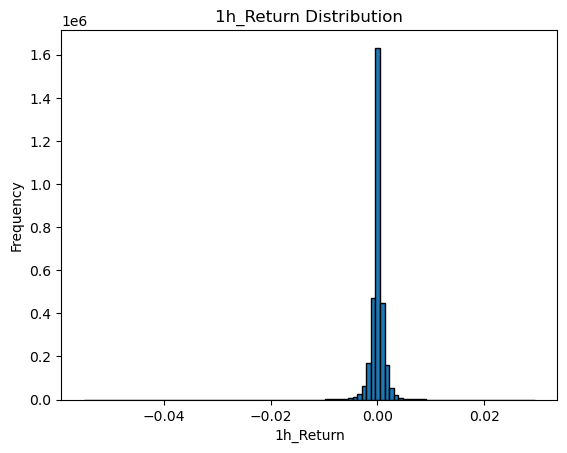

count    3.090166e+06
mean     2.224289e-06
std      1.196069e-03
min     -5.500686e-02
25%     -3.559523e-04
50%     -2.467944e-06
75%      3.915525e-04
max      2.950048e-02
Name: 1h_Return, dtype: float64

In [22]:
# リターンは０、もしくは０より大きい場合はラベルが１、他の場合は０
NZDJPY['Label'] = np.where(NZDJPY['1h_Return'] >= 0, 1, 0)
label_counts = NZDJPY['Label'].value_counts()
print("the number of positive return：", label_counts[1])
print("the number of negative return：", label_counts[0])

NZDJPY['Currency'] = 6
display(NZDJPY)

plt.hist(NZDJPY['1h_Return'], bins=99,edgecolor='black')
plt.title('1h_Return Distribution')
plt.xlabel('1h_Return')
plt.ylabel('Frequency')
plt.show()

NZDJPY['1h_Return'].describe()

In [23]:
# ファイルに保存する
NZDJPY.to_csv('processed_data/NZDJPY.csv', index=False)

# GBPJPY
補完前のデータ数 2148223  
補完後のデータ数 3090166  

In [24]:
# CSVファイルを読み込む
GBPJPY = pd.read_csv('currency_pair/GBPJPY.csv',sep = ',')

# 'Times' 列を日時型に変換する
GBPJPY['Times'] = pd.to_datetime(GBPJPY['Times'], format='%Y%m%d %H%M%S',errors='coerce')

# 重複した行を削除する
GBPJPY = GBPJPY.drop_duplicates(subset=['Times'])

display(GBPJPY)

,Times,Final Price
0,2018-01-01 17:07:00,152.128
1,2018-01-01 17:08:00,152.100
2,2018-01-01 17:09:00,152.091
3,2018-01-01 17:10:00,152.093
4,2018-01-01 17:11:00,152.084
...,...,...
2164610,2023-11-24 16:54:00,188.292
2164611,2023-11-24 16:55:00,188.303
2164612,2023-11-24 16:56:00,188.307
2164613,2023-11-24 16:57:00,188.166


In [25]:
# 'Times' 列をインデックスに設定し、1分ごとのデータに補完して再設定
GBPJPY.set_index('Times', inplace=True)
GBPJPY = GBPJPY.resample('1T').interpolate().reset_index()

# 価格を正規化する
GBPJPY['Final Price Normalized'] = scaler.fit_transform(GBPJPY[['Final Price']])

# 1時間ごとのリターンを計算する
GBPJPY['1h_Return'] = np.log(GBPJPY['Final Price'] / GBPJPY['Final Price'].shift(60))
GBPJPY['1h_Return'] = GBPJPY['1h_Return'].fillna(0)

display(GBPJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,NaT,NaN,NaN,0.000000
1,2018-01-01 17:07:00,152.128,0.432853,0.000000
2,2018-01-01 17:08:00,152.100,0.432418,0.000000
3,2018-01-01 17:09:00,152.091,0.432278,0.000000
4,2018-01-01 17:10:00,152.093,0.432309,0.000000
...,...,...,...,...
3100308,2023-11-24 16:54:00,188.292,0.994441,-0.000653
3100309,2023-11-24 16:55:00,188.303,0.994611,-0.000711
3100310,2023-11-24 16:56:00,188.307,0.994674,-0.000557
3100311,2023-11-24 16:57:00,188.166,0.992484,-0.001291


In [26]:
# データを指定の期間にトリミングする
GBPJPY.set_index('Times', inplace=True)

start_date = '2018-01-01 18:09:00'
end_date = '2023-11-17 16:54:00'
GBPJPY = GBPJPY.loc[start_date:end_date]
GBPJPY.reset_index(inplace=True)
display(GBPJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 18:09:00,152.231,0.434452,0.000920
1,2018-01-01 18:10:00,152.227,0.434390,0.000881
2,2018-01-01 18:11:00,152.214,0.434188,0.000854
3,2018-01-01 18:12:00,152.248,0.434716,0.000723
4,2018-01-01 18:13:00,152.282,0.435244,0.001078
...,...,...,...,...
3090161,2023-11-17 16:50:00,186.506,0.966706,0.000574
3090162,2023-11-17 16:51:00,186.507,0.966722,0.000520
3090163,2023-11-17 16:52:00,186.493,0.966504,0.000461
3090164,2023-11-17 16:53:00,186.503,0.966659,0.000434


the number of positive return： 1444369
the number of negative return： 1645797


,Times,Final Price,Final Price Normalized,1h_Return,Label,Currency
0,2018-01-01 18:09:00,152.231,0.434452,0.000920,1,7
1,2018-01-01 18:10:00,152.227,0.434390,0.000881,1,7
2,2018-01-01 18:11:00,152.214,0.434188,0.000854,1,7
3,2018-01-01 18:12:00,152.248,0.434716,0.000723,1,7
4,2018-01-01 18:13:00,152.282,0.435244,0.001078,1,7
...,...,...,...,...,...,...
3090161,2023-11-17 16:50:00,186.506,0.966706,0.000574,1,7
3090162,2023-11-17 16:51:00,186.507,0.966722,0.000520,1,7
3090163,2023-11-17 16:52:00,186.493,0.966504,0.000461,1,7
3090164,2023-11-17 16:53:00,186.503,0.966659,0.000434,1,7


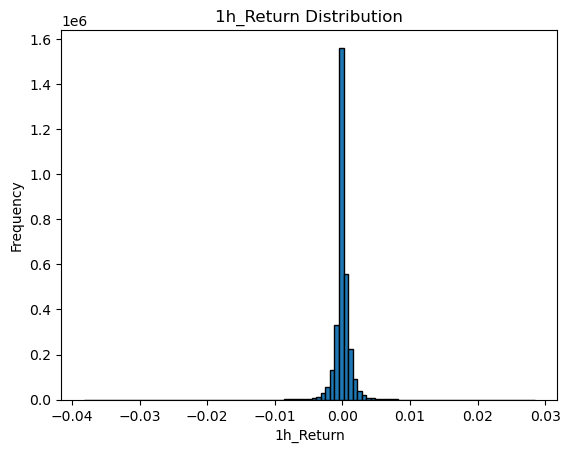

count    3.090166e+06
mean     3.957414e-06
std      1.098353e-03
min     -3.821920e-02
25%     -2.826373e-04
50%     -6.239514e-06
75%      3.257297e-04
max      2.844990e-02
Name: 1h_Return, dtype: float64

In [27]:
# リターンは０、もしくは０より大きい場合はラベルが１、他の場合は０
GBPJPY['Label'] = np.where(GBPJPY['1h_Return'] >= 0, 1, 0)
label_counts = GBPJPY['Label'].value_counts()
print("the number of positive return：", label_counts[1])
print("the number of negative return：", label_counts[0])

GBPJPY['Currency'] = 7
display(GBPJPY)

# リターンの分布を描く
plt.hist(GBPJPY['1h_Return'], bins=99,edgecolor='black')
plt.title('1h_Return Distribution')
plt.xlabel('1h_Return')
plt.ylabel('Frequency')
plt.show()

GBPJPY['1h_Return'].describe()

In [28]:
# ファイルに保存する
GBPJPY.to_csv('processed_data/GBPJPY.csv', index=False)

# CHFJPY
補完前のデータ数 2144533  
補完後のデータ数 3090166  

In [29]:
# ファイルを読み込む
CHFJPY = pd.read_csv('currency_pair/CHFJPY.csv',sep = ',')

# 'Times' 列を日時型に変換する
CHFJPY['Times'] = pd.to_datetime(CHFJPY['Times'], format='%Y%m%d %H%M%S',errors='coerce')

# 重複した行を削除する
CHFJPY = CHFJPY.drop_duplicates(subset=['Times'])

display(CHFJPY)

,Times,Final Price
0,2018-01-01 17:02:00,115.490
1,2018-01-01 17:03:00,115.486
2,2018-01-01 17:04:00,115.469
3,2018-01-01 17:05:00,115.477
4,2018-01-01 17:06:00,115.436
...,...,...
2144828,2023-11-24 16:40:00,169.314
2144829,2023-11-24 16:43:00,169.223
2144830,2023-11-24 16:44:00,169.273
2144831,2023-11-24 16:48:00,169.182


In [30]:
# 'Times' 列をインデックスに設定し、1分ごとのデータに補完して再設定
CHFJPY.set_index('Times', inplace=True)
CHFJPY = CHFJPY.resample('1T').interpolate().reset_index()

# 価格を正規化する
CHFJPY['Final Price Normalized'] = scaler.fit_transform(CHFJPY[['Final Price']])

# 1時間ごとのリターンを計算する
CHFJPY['1h_Return'] = np.log(CHFJPY['Final Price'] / CHFJPY['Final Price'].shift(60))
CHFJPY['1h_Return'] = CHFJPY['1h_Return'].fillna(0)

display(CHFJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 17:02:00,115.49000,0.143808,0.000000
1,2018-01-01 17:03:00,115.48600,0.143746,0.000000
2,2018-01-01 17:04:00,115.46900,0.143482,0.000000
3,2018-01-01 17:05:00,115.47700,0.143606,0.000000
4,2018-01-01 17:06:00,115.43600,0.142968,0.000000
...,...,...,...,...
3100304,2023-11-24 16:46:00,169.22750,0.979890,-0.001048
3100305,2023-11-24 16:47:00,169.20475,0.979537,-0.001177
3100306,2023-11-24 16:48:00,169.18200,0.979183,-0.001311
3100307,2023-11-24 16:49:00,169.20550,0.979548,-0.000665


In [31]:
# データを指定の期間にトリミングする
CHFJPY.set_index('Times', inplace=True)

start_date = '2018-01-01 18:09:00'
end_date = '2023-11-17 16:54:00'
CHFJPY = CHFJPY.loc[start_date:end_date]
CHFJPY.reset_index(inplace=True)
display(CHFJPY)

,Times,Final Price,Final Price Normalized,1h_Return
0,2018-01-01 18:09:00,115.629,0.145971,0.001593
1,2018-01-01 18:10:00,115.635,0.146064,0.001237
2,2018-01-01 18:11:00,115.643,0.146189,0.001298
3,2018-01-01 18:12:00,115.639,0.146127,0.001272
4,2018-01-01 18:13:00,115.641,0.146158,0.001289
...,...,...,...,...
3090161,2023-11-17 16:50:00,168.930,0.975262,0.000018
3090162,2023-11-17 16:51:00,168.935,0.975340,-0.000024
3090163,2023-11-17 16:52:00,168.935,0.975340,-0.000107
3090164,2023-11-17 16:53:00,168.937,0.975371,-0.000160


the number of positive return： 1419330
the number of negative return： 1670836


,Times,Final Price,Final Price Normalized,1h_Return,Label,Currency
0,2018-01-01 18:09:00,115.629,0.145971,0.001593,1,8
1,2018-01-01 18:10:00,115.635,0.146064,0.001237,1,8
2,2018-01-01 18:11:00,115.643,0.146189,0.001298,1,8
3,2018-01-01 18:12:00,115.639,0.146127,0.001272,1,8
4,2018-01-01 18:13:00,115.641,0.146158,0.001289,1,8
...,...,...,...,...,...,...
3090161,2023-11-17 16:50:00,168.930,0.975262,0.000018,1,8
3090162,2023-11-17 16:51:00,168.935,0.975340,-0.000024,0,8
3090163,2023-11-17 16:52:00,168.935,0.975340,-0.000107,0,8
3090164,2023-11-17 16:53:00,168.937,0.975371,-0.000160,0,8


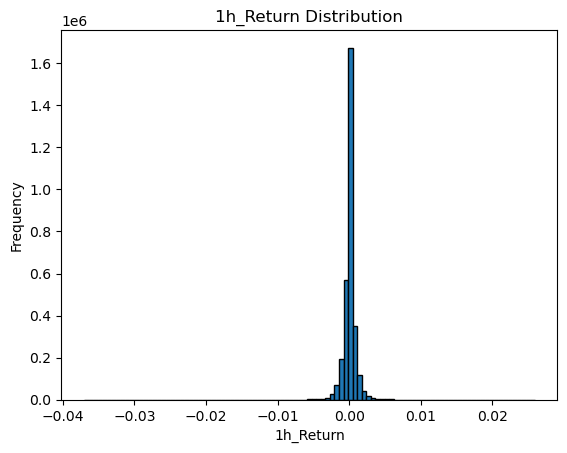

count    3.090166e+06
mean     7.390317e-06
std      8.268504e-04
min     -3.705788e-02
25%     -2.307479e-04
50%     -7.789770e-06
75%      2.639998e-04
max      2.593904e-02
Name: 1h_Return, dtype: float64

In [32]:
# リターンは０、もしくは０より大きい場合はラベルが１、他の場合は０
CHFJPY['Label'] = np.where(CHFJPY['1h_Return'] >= 0, 1, 0)
label_counts = CHFJPY['Label'].value_counts()
print("the number of positive return：", label_counts[1])
print("the number of negative return：", label_counts[0])

CHFJPY['Currency'] = 8
display(CHFJPY)

# リターンの分布を描く
plt.hist(CHFJPY['1h_Return'], bins=99,edgecolor='black')
plt.title('1h_Return Distribution')
plt.xlabel('1h_Return')
plt.ylabel('Frequency')
plt.show()

CHFJPY['1h_Return'].describe()

In [33]:
# CSVファイルに保存する
CHFJPY.to_csv('processed_data/CHFJPY.csv', index=False)